In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


1 . Import required libraries and read the dataset.


In [7]:
df=pd.read_csv('honeyproduction.csv')


2 . Check the first few samples, shape, info of the data and try to familiarize yourself with different features.


In [9]:
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [12]:
df.shape

(626, 8)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.3+ KB


The only object column is state other than that all are numerics.

In [92]:
df.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07,2012.000000


In [94]:
df.isnull().sum()

state          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

No null values in dataset

3. Display the percentage distribution of the data in each year using the pie chart.


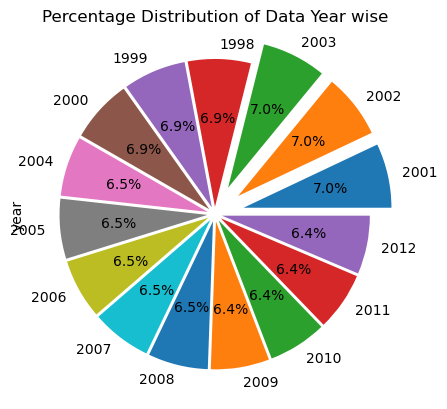

In [97]:
chart = df['year'].value_counts()
expl = (0.2, 0.2, 0.2, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05) 
chart.plot.pie(autopct='%1.1f%%', startangle=0,explode=expl)
plt.title('Percentage Distribution of Data Year wise')
plt.show()


We can see that the exploded ones(2001,2002,2003) have maximum distribution percentage.
From 1998-2000 6.9%
Remaing all years have 6.4% of average.     


4 . Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings.


C:\Users\revathi\AppData\Local\Temp\ipykernel_1400\3619980358.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['priceperlb'])


Text(0, 0.5, 'Frequency')

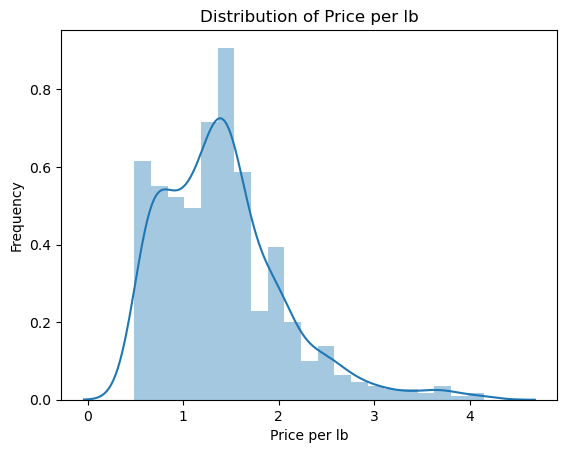

In [98]:
sns.distplot(x=df['priceperlb'])
plt.title('Distribution of Price per lb')
plt.xlabel('Price per lb')
plt.ylabel('Frequency')

From the distplot we can see that positively skewed which means most of the values present to the left.

5 . Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and
write your findings.

Text(0.5, 1.0, 'Production value by numcol wise')

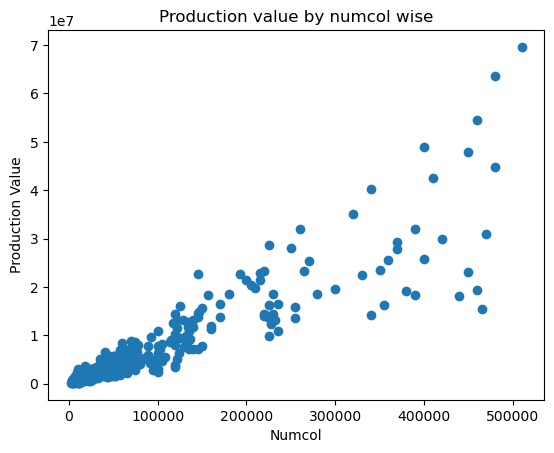

In [105]:
plt.scatter(x=df['numcol'],y=df['prodvalue'],marker='o')
plt.xlabel('Numcol')
plt.ylabel('Production Value')
plt.title('Production value by numcol wise')

From the above scatterplot it can be seen that product value increases with increase in number of honey producing colonies. 

It also shows posssitive correlation.

Most of the values are present within 0 to  100000 number of colonies.

6 . Plot and understand the relationship between categorical variable 'year' and a numerical variable
'prodvalue' through boxplot, and write your findings.

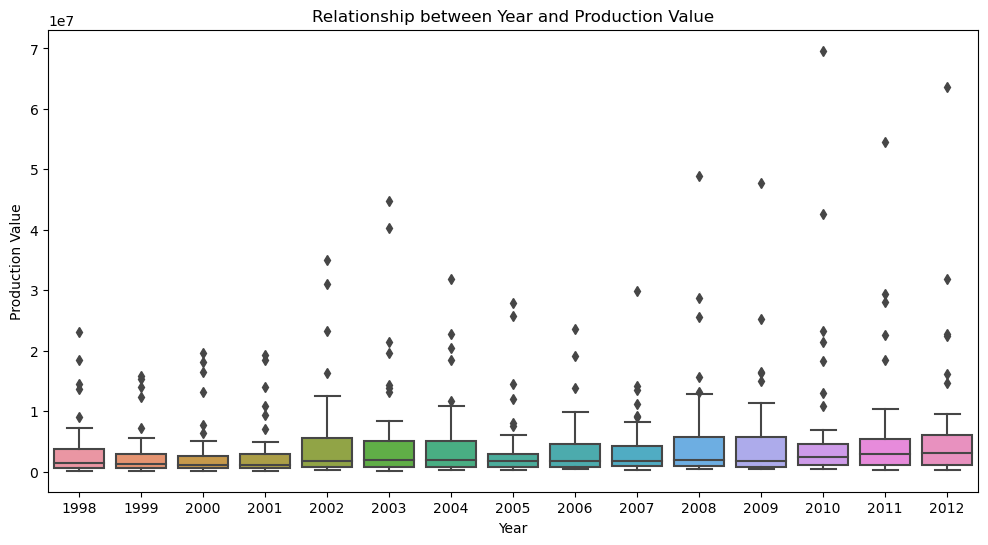

In [72]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='prodvalue', data=df)
plt.title('Relationship between Year and Production Value')
plt.xlabel('Year')
plt.ylabel('Production Value')
plt.show()

From the above boxplot we can observe that  initially production value was low till 2001.
From 2002 to 2004 production increased compared to previous years.
Again in 2005 there is sudden drop the in 2005 and 2006 production value slightly increases.
From 2009 to 2012 the average production value was good.

    7 . Visualize and understand the relationship between the multiple pairs of variables throughout different years
using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')


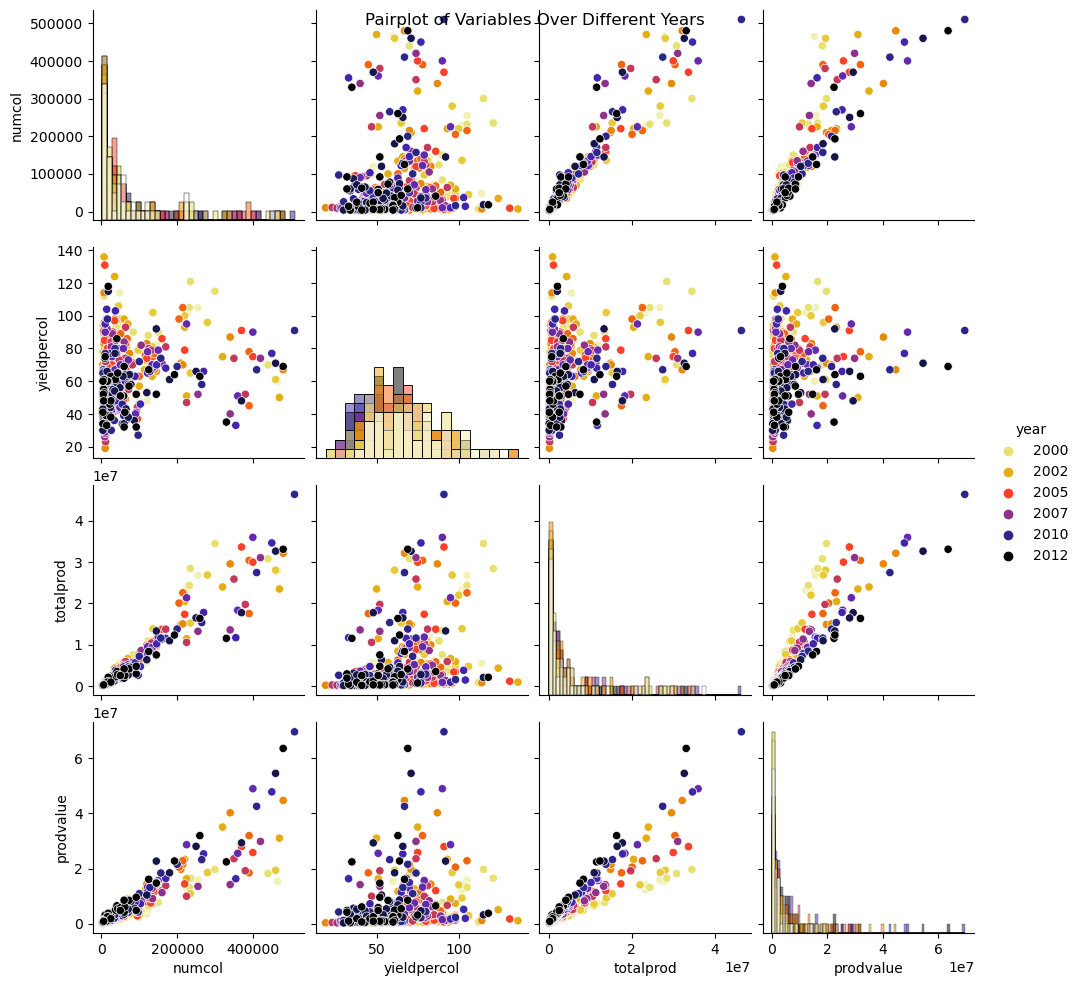

In [109]:
columns_to_plot = ['numcol', 'yieldpercol', 'totalprod', 'prodvalue', 'year']
pairplot = sns.pairplot(df[columns_to_plot], hue='year',diag_kind='hist', palette='CMRmap_r')
plt.suptitle('Pairplot of Variables Over Different Years')
plt.show()

Numcol is poitively skewed.
In the year 2012 yieldper col is on lower side and slightly positive correlated with numcol.
Numcol increases with total production here also most of the values of 2012 present on the lower side.
Yiel per col also slightly positively skewed.
Total production against yield percol most of the values are present at lower sideand slight shows positive correlated.
Yield per col vs prodvalue doesnt shows amny patterns.
Totalprod is positively skewed.
Total pro increases with prodvalue which is stringly positive correlated.
Prod value is positively skewed.

8 . Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol',
'total prod', 'stocks', 'price per lb', 'prodvalue')

In [85]:
df1=df.corr(numeric_only=True)
df1

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
numcol,1.000000,0.243515,0.953594,0.825929,-0.232701,0.912796,0.008709
yieldpercol,0.243515,1.000000,0.396252,0.367812,-0.358646,0.278977,-0.232092
totalprod,0.953594,0.396252,1.000000,0.878830,-0.264499,0.907236,-0.055556
stocks,0.825929,0.367812,0.878830,1.000000,-0.305867,0.728560,-0.119602
priceperlb,-0.232701,-0.358646,-0.264499,-0.305867,1.000000,-0.089567,0.693984
prodvalue,0.912796,0.278977,0.907236,0.728560,-0.089567,1.000000,0.139451
year,0.008709,-0.232092,-0.055556,-0.119602,0.693984,0.139451,1.000000


<Axes: >

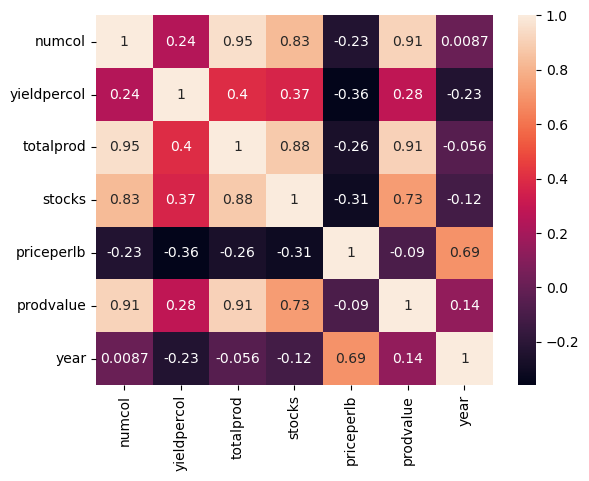

In [111]:
sns.heatmap(df1,annot=True)Stocks

Numcol and prodvalue is strongly positive correlated.
Stocks and numcol is also positive correlated.
Year and yieldpercol is negatively correlated.
Totalpro and numcol is strongly correlated.
Stocks and Totalpro positive correlated.
priceperlib is negatively correlated with all  the columns except year.
Prodvalue and totalpro is strongly correlated.
Year is also negatively correlated for all except priceperlib.